In [1]:
#After adding all the features we iproved from R^2 = 0.43 to R^2 = 0.49

In [2]:
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)


import matplotlib.pyplot as plt
%matplotlib inline  


In [3]:
#reading the csv and select to columns from the modle
Anime_df = pd.read_csv("ML_Df.csv")
Score_Above_8 = Anime_df.copy()

In [4]:
Score_Above_8.Favorites

0      193718.00
1       13321.00
2       47486.00
3      164108.00
4       13965.00
          ...   
5554        1.00
5555        0.00
5556        0.00
5557        1.00
5558        0.00
Name: Favorites, Length: 5559, dtype: float64

In [5]:
##loop for catigorazing the score
#for i in range (Score_Above_8.shape[0]):
#    if Score_Above_8.iloc[i,0] >= 8:
#        Score_Above_8.iloc[i,0] = "Sucsseful"
#    elif 6 <= Score_Above_8.iloc[i,0] <= 8:
#        Score_Above_8.iloc[i,0] = "Mid Succes "
#    else:
#        Score_Above_8.iloc[i,0] = "Not Sucssesful"
#        

In [6]:
for i in range (Score_Above_8.shape[0]):
    if Score_Above_8.iloc[i,0] >= 8:
        Score_Above_8.iloc[i,0] = "Sucsseful"
    else:
        Score_Above_8.iloc[i,0] = "Not Sucssesful"

In [7]:
test_df = pd.get_dummies(Score_Above_8, "Score")
#test_df.to_csv("ML_Tree_with_Dummies.csv", index = False)

<AxesSubplot:xlabel='Favorites', ylabel='Score'>

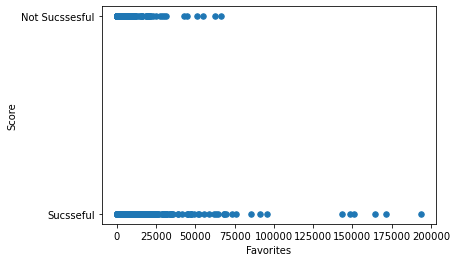

In [8]:
Score_Above_8.plot.scatter(x='Favorites',y='Score',s=30)

In [9]:
Score_Above_8.Score.unique()

array(['Sucsseful', 'Not Sucssesful'], dtype=object)

In [10]:
TRAINING_FEATURES = Score_Above_8[Score_Above_8.columns.difference(["Score"])]

TARGET_FEATURE    = 'Score'

X = TRAINING_FEATURES
y = Score_Above_8[TARGET_FEATURE]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.25)

In [12]:
Score_Above_8 = Score_Above_8[["Score", "Rank", "Scored_By", "Episodes", "Duration", "Popularity", "Members", "Favorites"]]
Score_Above_8

,Score,Rank,Scored_By,Episodes,Duration,Popularity,Members,Favorites
0,Sucsseful,1.00,1674539.00,64.00,24.00,3.00,2753439.00,193718.00
1,Sucsseful,2.00,175304.00,51.00,24.00,339.00,502351.00,13321.00
2,Sucsseful,3.00,1142680.00,10.00,23.00,33.00,1683363.00,47486.00
3,Sucsseful,4.00,1131835.00,24.00,24.00,13.00,2144169.00,164108.00
4,Sucsseful,5.00,128247.00,13.00,23.00,609.00,302846.00,13965.00
...,...,...,...,...,...,...,...,...
5554,Not Sucssesful,17408.00,69593.15,35.17,19.30,15611.00,246.00,1.00
5555,Not Sucssesful,17419.00,69593.15,35.17,19.30,18569.00,45.00,0.00
5556,Not Sucssesful,17421.00,69593.15,35.17,19.30,13668.00,410.00,0.00
5557,Not Sucssesful,17423.00,69593.15,35.17,19.30,12617.00,605.00,1.00


In [13]:
print(f"Number of Rows, Features in Training Dataset: {X_train.shape}")
print(f"Number of Rows, Features in Test Dataset: {X_test.shape}")

print(f"Number of Rows in Training Response: {y_train.shape}")
print(f"Number of Rows in Test Response: {y_test.shape}")

Number of Rows, Features in Training Dataset: (4169, 40)
Number of Rows, Features in Test Dataset: (1390, 40)
Number of Rows in Training Response: (4169,)
Number of Rows in Test Response: (1390,)


In [14]:
lrm = LogisticRegression()

# Get accuracy using train set
lrm.fit(X_train, y_train)

print(lrm.classes_)
print(f"LogisticRegression Accuracy train Score: {lrm.score(X_train, y_train)}")

['Not Sucssesful' 'Sucsseful']
LogisticRegression Accuracy train Score: 0.9865675221875749


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Get accuracy using test set
y_pred = lrm.predict(X_test)

print(f"LogisticRegression Accuracy test Score: {np.mean(y_pred == y_test)}")

LogisticRegression Accuracy test Score: 0.9848920863309353


In [16]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [17]:
Score_Above_8

,Score,Rank,Scored_By,Episodes,Duration,Popularity,Members,Favorites
0,Sucsseful,1.00,1674539.00,64.00,24.00,3.00,2753439.00,193718.00
1,Sucsseful,2.00,175304.00,51.00,24.00,339.00,502351.00,13321.00
2,Sucsseful,3.00,1142680.00,10.00,23.00,33.00,1683363.00,47486.00
3,Sucsseful,4.00,1131835.00,24.00,24.00,13.00,2144169.00,164108.00
4,Sucsseful,5.00,128247.00,13.00,23.00,609.00,302846.00,13965.00
...,...,...,...,...,...,...,...,...
5554,Not Sucssesful,17408.00,69593.15,35.17,19.30,15611.00,246.00,1.00
5555,Not Sucssesful,17419.00,69593.15,35.17,19.30,18569.00,45.00,0.00
5556,Not Sucssesful,17421.00,69593.15,35.17,19.30,13668.00,410.00,0.00
5557,Not Sucssesful,17423.00,69593.15,35.17,19.30,12617.00,605.00,1.00


In [18]:
#Naive Base
# Split into training and test sets
X = Score_Above_8.iloc[:,1:].values
y = Score_Above_8["Score"].values

XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.25)
#titanic_predictors

In [19]:
# Instantiate the classifier
gnb = GaussianNB()


# Train classifier
gnb.fit(XTrain,yTrain)

y_pred = gnb.predict(XTest)
y_pred_train = gnb.predict(XTrain)

# Print results
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on Train data=  0.9489086111777405
Accuracy on test data=  0.9546762589928057


In [20]:
# get the class probabilities
gnb.class_prior_

array([0.94195251, 0.05804749])

In [21]:
gnb.theta_

array([[7.56808579e+03, 5.46759063e+04, 3.56995792e+01, 1.91265592e+01,
        7.72817214e+03, 7.46851966e+04, 5.61241151e+02],
       [3.00539605e+02, 3.28706603e+05, 2.78808866e+01, 2.37656861e+01,
        8.07466942e+02, 6.07471653e+05, 1.54589711e+04]])

In [22]:
gnb.sigma_

array([[2.42210706e+07, 1.02668078e+10, 7.56044743e+03, 1.33969932e+02,
        3.62665998e+07, 3.34033219e+10, 7.31347007e+06],
       [2.20396417e+05, 1.41366630e+11, 1.79027203e+03, 7.35976474e+01,
        9.37099612e+05, 3.49766639e+11, 6.83318894e+08]])

In [23]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

##TREE



In [24]:
##trying with decision tree##

In [25]:
decisionTree = tree.DecisionTreeClassifier()

In [26]:
TRAINING_FEATURES = Score_Above_8[Score_Above_8.columns.difference(["Score"])]

TARGET_FEATURE    = 'Score'

X = TRAINING_FEATURES
y = Score_Above_8[TARGET_FEATURE]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

In [28]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Do random forest
rf = RandomForestClassifier(bootstrap= True, n_estimators=300, random_state=0)
trained_forest = rf.fit(X_train, y_train)
# Train accuracy
tra_score=rf.score(X, y)

print("Training accuracy for RandomForest: ",tra_score)

Training accuracy for RandomForest:  1.0
Wall time: 776 ms


In [29]:
%%time
y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  1.0
Accuracy on test data=  1.0
Wall time: 157 ms


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'max_depth':[2,4,6,8],"min_samples_split":[5,10,20,25,50] }
dt = tree.DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

best parameter set is: {'max_depth': 2, 'min_samples_split': 5}  and its score was 0.9992802876546302


In [31]:
all_features = [ "Rank", "Scored_By", "Episodes", "Duration", "Popularity", "Members", "Favorites"]
featuresDF=pd.DataFrame({"features":all_features,"weights":trained_forest.feature_importances_})
featuresDF.sort_values("weights",ascending=False)

,features,weights
5,Members,0.66
2,Episodes,0.16
3,Duration,0.07
4,Popularity,0.05
6,Favorites,0.04
1,Scored_By,0.01
0,Rank,0.01
